In [50]:
from pandas import read_csv
#Load data set
series_influ_A_df = read_csv('../data/vietnam_flu_A.csv', usecols=[1], engine='python')
# series_influ_A_df = series_influ_A_df["Influenza A - All types of surveillance"]
series_influ_A_df = series_influ_A_df.dropna()
series_influ_A_df = series_influ_A_df.astype('float32')
series_influ_A_df = series_influ_A_df.values
# normalize the dataset
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(series_influ_A_df)
# Create Training and Test
train = dataset[:735, :]
test = dataset[735:, :]

In [37]:
import numpy as np
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [52]:
look_back = 2
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [54]:
print(trainX.shape)
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))


(732, 2)


In [45]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100


d:\my_study\gr3\DATN\venv\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


732/732 - 2s - 2ms/step - loss: 0.0143
Epoch 2/100
732/732 - 1s - 1ms/step - loss: 0.0068
Epoch 3/100
732/732 - 1s - 1ms/step - loss: 0.0052
Epoch 4/100
732/732 - 1s - 1ms/step - loss: 0.0051
Epoch 5/100
732/732 - 1s - 1ms/step - loss: 0.0051
Epoch 6/100
732/732 - 1s - 1ms/step - loss: 0.0050
Epoch 7/100
732/732 - 1s - 1ms/step - loss: 0.0050
Epoch 8/100
732/732 - 1s - 1ms/step - loss: 0.0050
Epoch 9/100
732/732 - 1s - 1ms/step - loss: 0.0049
Epoch 10/100
732/732 - 1s - 1ms/step - loss: 0.0049
Epoch 11/100
732/732 - 1s - 1ms/step - loss: 0.0049
Epoch 12/100
732/732 - 1s - 1ms/step - loss: 0.0049
Epoch 13/100
732/732 - 1s - 1ms/step - loss: 0.0049
Epoch 14/100
732/732 - 1s - 1ms/step - loss: 0.0048
Epoch 15/100
732/732 - 1s - 1ms/step - loss: 0.0048
Epoch 16/100
732/732 - 1s - 1ms/step - loss: 0.0049
Epoch 17/100
732/732 - 1s - 1ms/step - loss: 0.0049
Epoch 18/100
732/732 - 1s - 1ms/step - loss: 0.0049
Epoch 19/100
732/732 - 1s - 1ms/step - loss: 0.0048
Epoch 20/100
732/732 - 1s - 985us

In [56]:
from sklearn.metrics import mean_squared_error
# make predictions
testPredict = model.predict(testX)
# invert predictions
testPredict = scaler.inverse_transform(testPredict)
testY_ = scaler.inverse_transform([testY])
print(testY_)
# calculate root mean squared error
testScore = np.sqrt(mean_squared_error(testY_[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
[[26.99999969 18.00000061 13.99999939 14.99999969 18.00000061 13.00000031
  17.00000031 14.99999969  5.          8.          1.          1.
   5.          1.          1.          0.          0.          0.
   1.          1.          4.          1.          3.          1.
   4.          4.          3.          6.          5.          9.00000031
   6.99999969  9.00000031  3.          3.          9.00000031 18.99999969
   3.          6.99999969 17.00000031 26.00000061 31.00000092 26.00000061
  29.99999939 27.99999878 39.00000092 37.00000031 16.         13.99999939
  10.          3.          1.          4.          1.          1.        ]]
Test Score: 5.81 RMSE


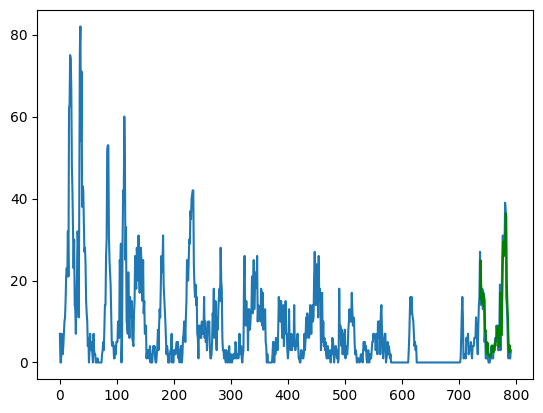

In [62]:
import matplotlib.pyplot as plt
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainX)+(look_back*2)+1:len(dataset)-1, :] = testPredict
plt.plot(scaler.inverse_transform(dataset))
plt.plot(testPredictPlot, color = 'green')
plt.show()